In [7]:
import gym
import marlenv

env = gym.make('Snake-v1', height=8, width=8)
env.seed(1)
obs = env.reset()[1]


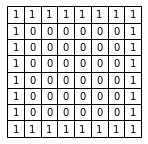

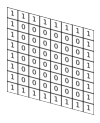

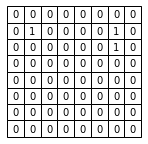

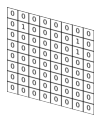

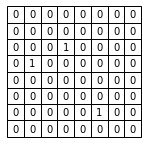

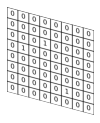

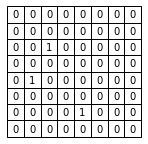

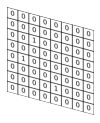

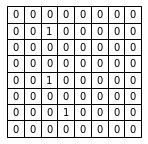

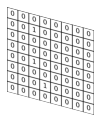

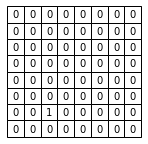

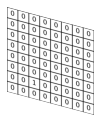

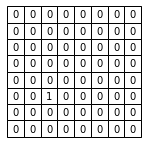

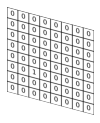

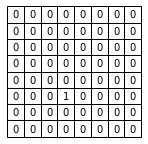

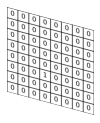

In [112]:
import matplotlib.pyplot as plt
from matplotlib import transforms

def func(data, i):

    nx = 2
    ny = 2

    fig = plt.figure(figsize=(2, 2))
    tb = plt.table(cellText=data, loc=(0,0), cellLoc='center')

    tc = tb.properties()['children']
    for cell in tc: 
        cell.set_height(1/ny * 0.3)
        cell.set_width(1/nx * 0.3)

    ax = plt.gca()
    ax.set_xlim(500, 2500)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.savefig(f'tmp{i}.png', dpi=500, transparent=True, bbox_inches="tight", pad_inches=0)


    fig = plt.figure(figsize=(nx,ny))

    img = plt.imread(f"tmp{i}.png")

    tr = transforms.Affine2D().skew_deg(0, 15)
    ax = plt.gca()
    # ax.set_xlim(370, 2710)
    ax.set_ylim(1160, -10)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    ax.imshow(img, transform=tr + ax.transData)
    plt.savefig(f'affine{i}.png', dpi=500, transparent=True, bbox_inches="tight", pad_inches=0)


for i in range(8):
    data = obs.squeeze()[:,:,i]
    func(data, i)

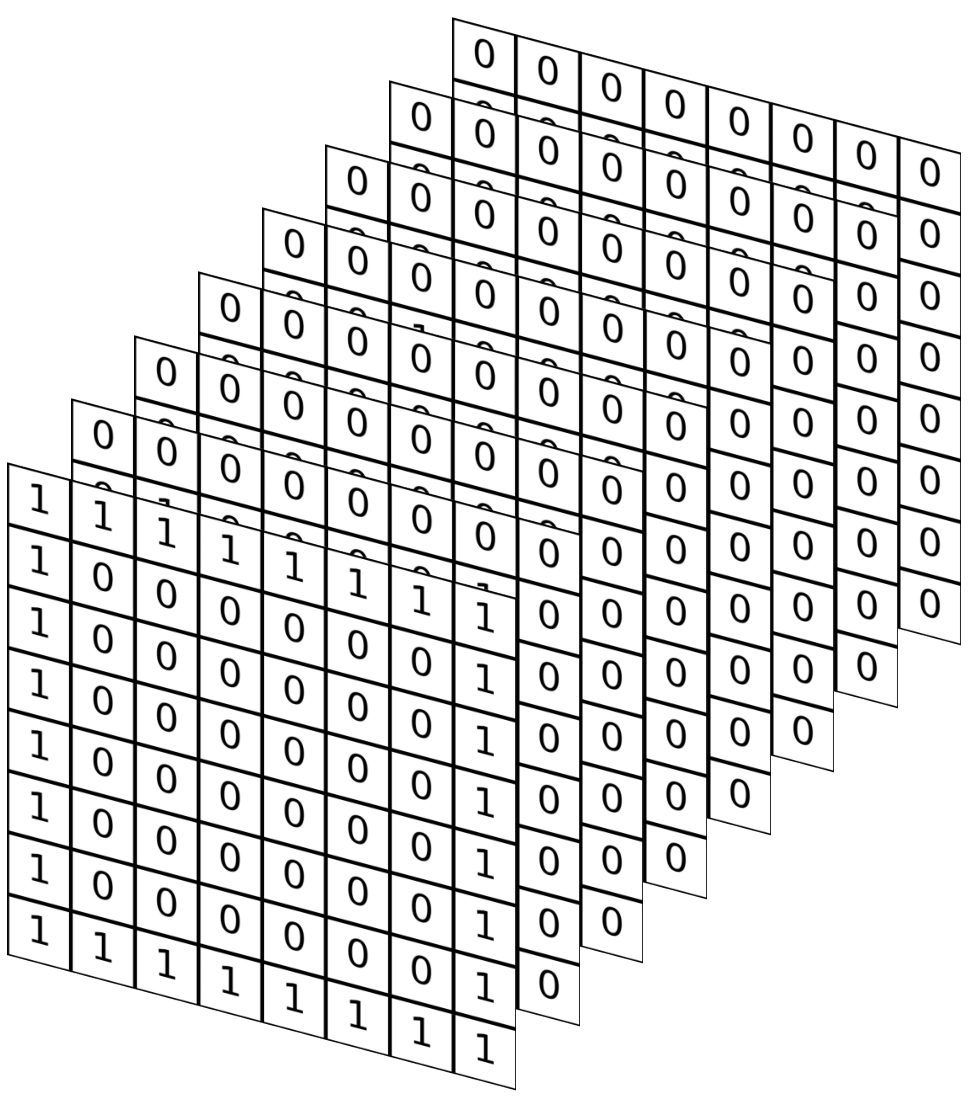

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
# plt.axis('off')
j=0
for i in range(7, -1, -1):
    img = plt.imread(f'affine{i}.png')
    plt.imshow(img, extent=[1-j, 2.6-j, -j, 2-j])

    j+=0.2
ax = plt.gca()
ax.set_xlim(-.4, 2.61)
ax.set_ylim(-1.4, 2.02)
ax.axis('off')
plt.savefig(f'final.png', transparent=True, dpi=25)

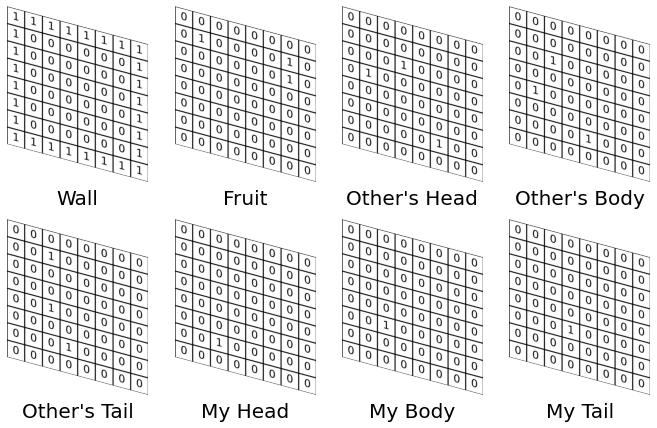

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
# plt.axis('off')
w=10
h=10
r=c=4

titles = "Wall, Fruit, Other's Head, Other's Body, Other's Tail, My Head, My Body, My Tail"
titles = titles.split(sep=", ")
titles.reverse()

j=0
for i, title in zip(range(7, -1, -1), titles):
    img = plt.imread(f'affine{i}.png')
    k = -(i-8)
    fig.add_subplot(r, c, i+1)
    ax = plt.gca()
    ax.set_title(title, fontdict={
        'fontsize': 20},
        y=-0.15),
    # ax.set_xlim(1120, 1950)
    # ax.set_ylim(1970, 1000)
    plt.imshow(img)
    plt.axis('off')
    j+=0.06
ax = plt.gca()
plt.subplots_adjust(wspace=-0.5)
plt.savefig(f'split.png', dpi=80, transparent=True, bbox_inches="tight")

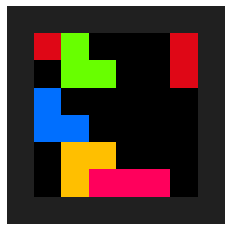

In [125]:
import matplotlib.pyplot as plt
img = env.render(mode='rgb_array')
ax = plt.gca()
ax.imshow(img)
plt.axis('off')
plt.savefig(f'render.png', dpi=100, transparent=True, bbox_inches="tight", pad_inches=0)


In [2]:
import gym
import marlenv

env = gym.make('Snake-v1', vision_range=5)
obs = env.reset()

/usr/local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(
/usr/local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:216: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator. 
  logger.warn(
/usr/local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:228: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passe

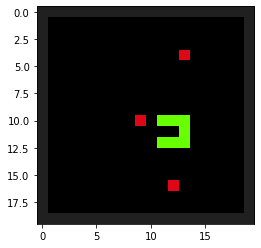

In [68]:
import numpy as np
env.step(np.array([0,0,0,0]))
img = env.render(mode='rgb_array')
plt.imshow(img)

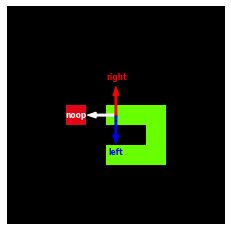

In [233]:
plt.imshow(img[5:16, 6:17])
ax = plt.gca()
ax.axis('off')
ax.arrow(5, 5, -1, 0, color='white', width=0.1)
ax.arrow(5, 5, 0, 1, color='blue', width=0.1)
ax.arrow(5, 5, 0, -1, color='red', width=0.1)
ax.annotate(text='noop', xy=(2.46, 5.1), color="white", fontsize=7.5, fontstyle='normal', fontweight='bold')
ax.annotate(text='right', xy=(4.5, 3.2), color="red", fontsize=7.5, fontstyle='normal', fontweight='bold')
ax.annotate(text='left', xy=(4.6, 7), color="blue", fontsize=7.5, fontstyle='normal', fontweight='bold')

plt.savefig('snake.png', dpi=120, transparent=True, bbox_inches="tight", pad_inches=0)

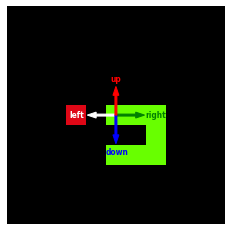

In [231]:
plt.imshow(img[5:16, 6:17])
ax = plt.gca()
ax.axis('off')
ax.arrow(5, 5, -1, 0, color='white', width=0.1)
ax.arrow(5, 5, 1, 0, color='green', width=0.1)
ax.arrow(5, 5, 0, 1, color='blue', width=0.1)
ax.arrow(5, 5, 0, -1, color='red', width=0.1)
ax.annotate(text='left', xy=(2.645, 5.1), color="white", fontsize=7.5, fontstyle='normal', fontweight='bold')
ax.annotate(text='up', xy=(4.7, 3.3), color="red", fontsize=7.5, fontstyle='normal', fontweight='bold')
ax.annotate(text='right', xy=(6.48, 5.1), color="green", fontsize=7.5, fontstyle='normal', fontweight='bold')
ax.annotate(text='down', xy=(4.5, 7), color="blue", fontsize=7.5, fontstyle='normal', fontweight='bold')

plt.savefig('human.png', dpi=120, transparent=True, bbox_inches="tight", pad_inches=0)